# Diabetes Prediction using DT and KNN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
diabetes_data = pd.read_csv("diabetes.csv")  #importing diabetes dataset
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
d_data = diabetes_data.copy() #copying diabetes data to another variable

In [5]:
d_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
d_data.isnull().values.any()       #shows that the diabetes dataset doesn't contain any null values    

False

In [7]:
d_data.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [8]:
d_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
d_data['Outcome'].value_counts()  

0    500
1    268
Name: Outcome, dtype: int64

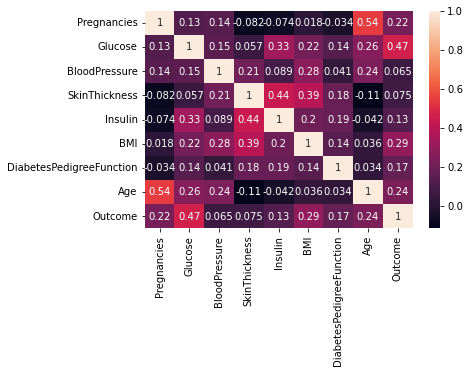

In [10]:
sns.heatmap(d_data.corr(), annot = True)   #greater than zero --> +ve relation
plt.show()                                  #less than zero    --> -ve relation

In [11]:
# after checking the correlation heat map it has been came to notice that the cols like Glucose,BMI,Age,Insulin has highly
#correalted with outcome.so we could use it as features

Total Persons have Diabetes 268
Total Persons doesn't have Diabetes 500


<AxesSubplot:xlabel='Outcome', ylabel='count'>

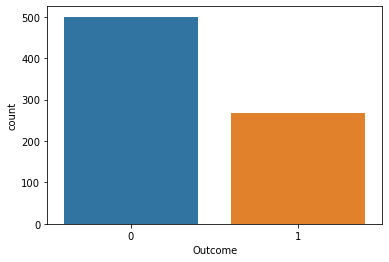

In [12]:
oneCount = 0
zeroCount = 0
for val in d_data['Outcome']:
    if val == 1:
        oneCount = oneCount + 1
    else:
        zeroCount = zeroCount + 1
        
print("Total Persons have Diabetes",oneCount)
print("Total Persons doesn't have Diabetes",zeroCount)
sns.countplot(x = 'Outcome',data = d_data)


In [13]:
#Checking Before the total number of "0" contained by particular column
c = 0
for i in d_data['Insulin']:
    if i == 0:
        c = c+1
print(c)

374


In [14]:
#replacing value 0 with the mean of the column
for i in d_data.columns[:-1]:
    data = d_data[i].mean()
    d_data[i] = d_data[i].replace(to_replace = 0, value = data)
    print(data)

3.8450520833333335
120.89453125
69.10546875
20.536458333333332
79.79947916666667
31.992578124999977
0.4718763020833327
33.240885416666664


In [15]:
d_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [16]:
#Checking After the total number of "0" contained by particular column
c = 0
for i in d_data['Insulin']:
    if i == 0:
        c = c+1
print(c)

0


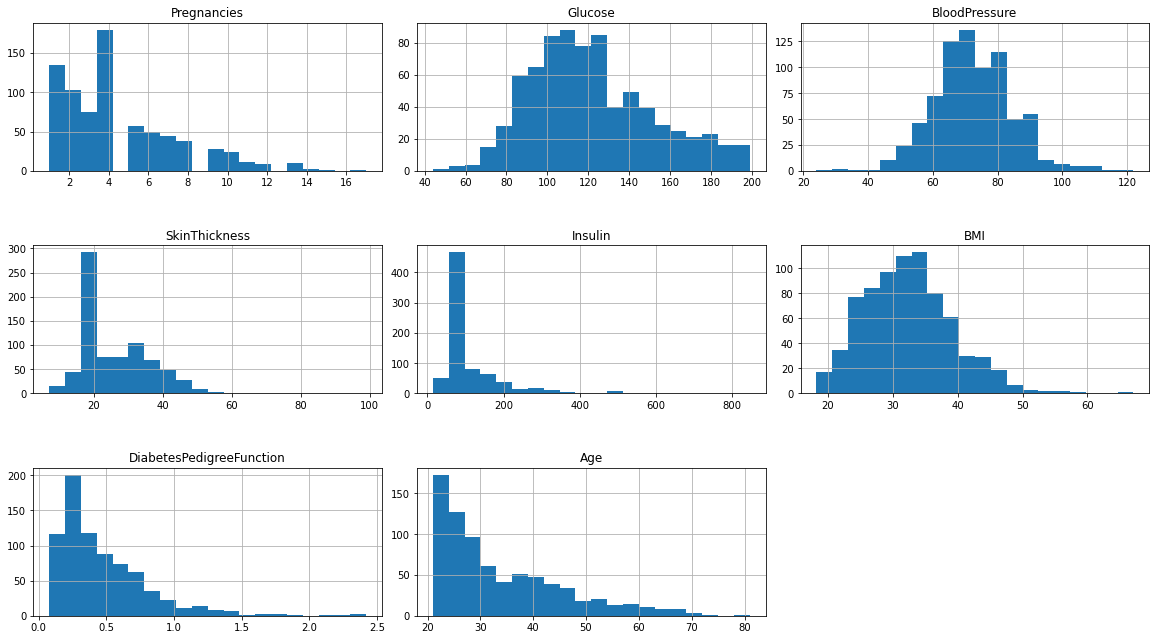

In [17]:
# Histogram of each feature
import itertools

col = d_data.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)
l = length // 2
for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((l), 3, j+1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    d_data[i].hist(bins = 20)                               #tellsthe freqencies of the features and also summarizing the datset colunns
    plt.title(i)                    
plt.show()

In [18]:
#tot diabetic patients under the age groups
c1 = 0
for i in range(len(d_data['Age'])):
    if(d_data['Age'].values[i]>=20 and  d_data['Age'].values[i]<=30):
        if(d_data['Outcome'].values[i] == 1):
            c1 = c1+1
print("Age 20-30 = ",c1,"are diabetic patient")
c2 = 0
for i in range(len(d_data['Age'])):
    if(d_data['Age'].values[i]>=30 and  d_data['Age'].values[i]<=40):
        if(d_data['Outcome'].values[i] == 1):
            c2 = c2+1
print("Age 30-40 = ",c2,"are diabetic patient")
c3 = 0
for i in range(len(d_data['Age'])):
    if(d_data['Age'].values[i]>=40 and  d_data['Age'].values[i]<=50):
        if(d_data['Outcome'].values[i] == 1):
            c3 = c3+1
print("Age 40-50 = ",c3,"are diabetic patient")
c4 = 0
for i in range(len(d_data['Age'])):
    if(d_data['Age'].values[i]>=50 and  d_data['Age'].values[i]<=60):
        if(d_data['Outcome'].values[i] == 1):
            c4 = c4+1
print("Age 50-60 = ",c4,"are diabetic patient")
c5 = 0
for i in range(len(d_data['Age'])):
    if(d_data['Age'].values[i]>=60 and  d_data['Age'].values[i]<=70):
        if(d_data['Outcome'].values[i] == 1):
            c5 = c5+1
print("Age 60-70 = ",c5,"are diabetic patient")
c6 = 0
for i in range(len(d_data['Age'])):
    if(d_data['Age'].values[i]>=70 and  d_data['Age'].values[i]<=80):
        if(d_data['Outcome'].values[i] == 1):
            c6 = c6+1
print("Age 70-80 = ",c6,"are diabetic patient")
c7 = 0
for i in range(len(d_data['Age'])):
    if(d_data['Age'].values[i]>=80 and  d_data['Age'].values[i]<=90):
        if(d_data['Outcome'].values[i] == 1):
            c7 = c7+1
print("Age 80-90 = ",c7,"are diabetic patient")

Age 20-30 =  90 are diabetic patient
Age 30-40 =  82 are diabetic patient
Age 40-50 =  70 are diabetic patient
Age 50-60 =  36 are diabetic patient
Age 60-70 =  9 are diabetic patient
Age 70-80 =  1 are diabetic patient
Age 80-90 =  0 are diabetic patient


In [19]:
#tot Non-diabetic patients under the age groups
c8 = 0
for i in range(len(d_data['Age'])):
    if(d_data['Age'].values[i]>=20 and  d_data['Age'].values[i]<=30):
        if(d_data['Outcome'].values[i] == 0):
            c8 = c8+1
print("Age 20-30 = ",c8,"are Non-diabetic patient")
c9 = 0
for i in range(len(d_data['Age'])):
    if(d_data['Age'].values[i]>=30 and  d_data['Age'].values[i]<=40):
        if(d_data['Outcome'].values[i] == 0):
            c9 = c9+1
print("Age 30-40 = ",c9,"are Non-diabetic patient")
c10 = 0
for i in range(len(d_data['Age'])):
    if(d_data['Age'].values[i]>=40 and  d_data['Age'].values[i]<=50):
        if(d_data['Outcome'].values[i] == 0):
            c10 = c10+1
print("Age 40-50 = ",c10,"are Non-diabetic patient")
c11 = 0
for i in range(len(d_data['Age'])):
    if(d_data['Age'].values[i]>=50 and  d_data['Age'].values[i]<=60):
        if(d_data['Outcome'].values[i] == 0):
            c11 = c11+1
print("Age 50-60 = ",c11,"are Non-diabetic patient")
c12 = 0
for i in range(len(d_data['Age'])):
    if(d_data['Age'].values[i]>=60 and  d_data['Age'].values[i]<=70):
        if(d_data['Outcome'].values[i] == 0):
            c12 = c12+1
print("Age 60-70 = ",c12,"are Non-diabetic patient")
c13 = 0
for i in range(len(d_data['Age'])):
    if(d_data['Age'].values[i]>=70 and  d_data['Age'].values[i]<=80):
        if(d_data['Outcome'].values[i] == 0):
            c13 = c13+1
print("Age 70-80 = ",c13,"are Non-diabetic patient")
c14 = 0
for i in range(len(d_data['Age'])):
    if(d_data['Age'].values[i]>=80 and  d_data['Age'].values[i]<=90):
        if(d_data['Outcome'].values[i] == 0):
            c14 = c14+1
print("Age 80-90 = ",c14,"are Non-diabetic patient")

Age 20-30 =  327 are Non-diabetic patient
Age 30-40 =  96 are Non-diabetic patient
Age 40-50 =  56 are Non-diabetic patient
Age 50-60 =  26 are Non-diabetic patient
Age 60-70 =  21 are Non-diabetic patient
Age 70-80 =  1 are Non-diabetic patient
Age 80-90 =  1 are Non-diabetic patient


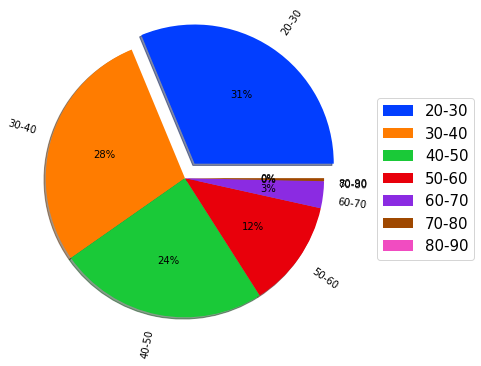

In [20]:
#plotting pie chart for different age groups who have diabetes
tot_count = [c1,c2,c3,c4,c5,c6,c7]
explode = [0.2, 0, 0, 0, 0, 0, 0]

age_gr = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']

# Seaborn color palette to plot pie chart
colors = sns.color_palette('bright')

# create pie chart using matplotlib
plt.pie(tot_count, labels = age_gr, colors=colors,autopct='%.0f%%', explode=explode, shadow=True, rotatelabels='true',radius = 1.6)
plt.legend(age_gr, bbox_to_anchor=(1.2,0.5), loc="center right", fontsize=15,bbox_transform=plt.gcf().transFigure)
plt.show()

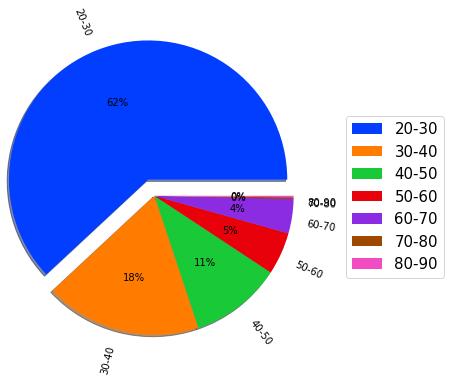

In [21]:
#plotting pie chart for different age groups who doesn't have diabetes
tot_count = [c8,c9,c10,c11,c12,c13,c14]
explode = [0.2, 0, 0, 0, 0, 0, 0]

age_gr = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']

# Seaborn color palette to plot pie chart
colors = sns.color_palette('bright')

# create pie chart using matplotlib
plt.pie(tot_count, labels = age_gr, colors=colors,autopct='%.0f%%', explode=explode, shadow=True, rotatelabels='true',radius = 1.6)
plt.legend(age_gr, bbox_to_anchor=(1.2,0.5), loc="center right", fontsize=15,bbox_transform=plt.gcf().transFigure)
plt.show()

In [24]:
def dtAlgo():
    #Applying Decision Tree Algorithm
    #importing req libraries for Decision Tree classifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn import metrics
    from sklearn import preprocessing
    from sklearn import utils
    from sklearn.preprocessing import StandardScaler

    #features
    features_sel = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
    X = d_data[features_sel] 
    #labels
    y = d_data['Outcome']


    scaler = StandardScaler()
    scaler.fit(X)
    standard_data = scaler.transform(X)


    X = standard_data



    #Train Test Split
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

    #creating DT CLassifier Object
    clf = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)  #max_depth --> to ensure that the model should not underfitted or overfitted


    #convert y values to categorical values
    lab = preprocessing.LabelEncoder()
    y_train = lab.fit_transform(y_train)
    y_test  = lab.fit_transform(y_test)

    #fitting the model
    trained = clf.fit(X_train,y_train)

    # accuracy score on the training data
    X_train_prediction = clf.predict(X_train)
    training_data_accuracy1 = metrics.accuracy_score(X_train_prediction, y_train)

    # accuracy score on the test data
    X_test_prediction = clf.predict(X_test)
    test_data_accuracy1 = metrics.accuracy_score(X_test_prediction,y_test)
    
    lb1 = lben1.get()
    lb2 = lben2.get()
    lb3 = lben3.get()
    lb4 = lben4.get()
    lb5 = lben5.get()
    lb6 = lben6.get()
    lb7 = lben7.get()
    lb8 = lben8.get()
    
    input_data = ([[lb1,lb2,lb3,lb4,lb5,lb6,lb7,lb8]])

    # changing the input_data to numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # reshape the array as we are predicting for one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

    # standardize the input data
    std_data = scaler.transform(input_data_reshaped)

    predicted_val = clf.predict(std_data)
    print(predicted_val)

    if (predicted_val[0] == 0):
        messagebox.showinfo("info","The person is not Diabetic\nAccuracy Score = '"+str(test_data_accuracy1*100)+"'")
    else:
        messagebox.showinfo("info","The person is Diabetic\nAccuracy Score = '"+str(test_data_accuracy1*100)+"'")

        
def knnAlgo():
    #applying KNN Algorithm
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import train_test_split
    from sklearn import metrics
    from sklearn import preprocessing
    from sklearn import utils
    from sklearn.preprocessing import StandardScaler

    #features
    features_sel = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
    X = d_data[features_sel] 
    #labels
    y = d_data['Outcome']


    scaler = StandardScaler()
    scaler.fit(X)
    standard_data = scaler.transform(X)


    X = standard_data



    #Train Test Split
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

    knn = KNeighborsClassifier(n_neighbors = 9)
    knn = knn.fit(X_train, y_train)

    # accuracy score on the training data
    X_train_prediction = knn.predict(X_train)
    training_data_accuracy2 = metrics.accuracy_score(X_train_prediction, y_train)

    # accuracy score on the test data
    X_test_prediction = knn.predict(X_test)
    test_data_accuracy2 = metrics.accuracy_score(X_test_prediction,y_test)
    
    lb1 = lben1.get()
    lb2 = lben2.get()
    lb3 = lben3.get()
    lb4 = lben4.get()
    lb5 = lben5.get()
    lb6 = lben6.get()
    lb7 = lben7.get()
    lb8 = lben8.get()

    input_data = ([[lb1,lb2,lb3,lb4,lb5,lb6,lb7,lb8]])

    # changing the input_data to numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # reshape the array as we are predicting for one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

    # standardize the input data
    std_data = scaler.transform(input_data_reshaped)

    predicted_val = knn.predict(std_data)
    print(predicted_val)
    
    if (predicted_val[0] == 0):
        messagebox.showinfo("info","The person is not Diabetic\nAccuracy Score = '"+str(test_data_accuracy2*100)+"'")
    else:
        messagebox.showinfo("info","The person is Diabetic\nAccuracy Score = '"+str(test_data_accuracy2*100)+"'")

        
        

def predictBtn():
    c = Combo1.get()
    if c == "Decision Tree":
        dtAlgo()
    elif c == "K-NearestNeighbour":
        knnAlgo()
    else:
        messagebox.showinfo("Error","Choose the Options Correctly!!!")


from tkinter import *;
from tkinter import ttk;
from PIL import Image,ImageTk;
from tkinter import messagebox
def mainFrame():
    global main_frame;
    global lben1
    global lben2
    global lben3
    global lben4
    global lben5
    global lben6
    global lben7
    global lben8
    global Combo1
    main_frame = Tk();
    main_frame.geometry("1000x600");
    main_frame.title("Diabetes Prediction System");
    Label(main_frame,text = "Diabetes Prediction System",justify = "center",font = ("times new roman",35,"bold"),fg = "Red",bg = "light blue",width = 300).pack();
    bg = Image.open("back.jpg").resize((1000,600));
    img = ImageTk.PhotoImage(bg,master = main_frame);
    lbl = Label(main_frame,image = img).pack(pady = 0.5 );
    optlist1 = ["Decision Tree","K-NearestNeighbour"];
    Combo1 = ttk.Combobox(main_frame,values = optlist1,width = 48,font = ("Times New Roman",12));
    Combo1.set("Select Algorithm - ");
    Combo1.place(x = 40,y = 90);
    label1 = Label(main_frame,text = "Enter Values\n⬇",font = ("Times new roman",18,"bold"),bg = "light blue",fg = "black").place(x = 170,y =130);
    lben1 = Entry(main_frame,width = 50,borderwidth = 3,font = ("Times New Roman",12));
    lben1.insert(0,"Enter Pregnancies")
    lben1.place(x = 40,y = 200);
    lben2 = Entry(main_frame,width = 50,borderwidth = 3,font = ("Times New Roman",12));
    lben2.insert(0,"Enter Glucose Level")
    lben2.place(x = 40,y = 240);
    lben3 = Entry(main_frame,width = 50,borderwidth = 3,font = ("Times New Roman",12));
    lben3.insert(0,"Enter Blood Pressure (mm Hg)")
    lben3.place(x = 40,y = 280);
    lben4 = Entry(main_frame,width = 50,borderwidth = 3,font = ("Times New Roman",12));
    lben4.insert(0,"Enter Skin Thickness (mm)")
    lben4.place(x = 40,y = 320);
    lben5 = Entry(main_frame,width = 50,borderwidth = 3,font = ("Times New Roman",12));
    lben5.insert(0,"Enter Insulin Level (mu U/ml)")
    lben5.place(x = 40,y = 360);
    lben6 = Entry(main_frame,width = 50,borderwidth = 3,font = ("Times New Roman",12));
    lben6.insert(0,"Enter BMI")
    lben6.place(x = 40,y = 400);
    lben7 = Entry(main_frame,width = 50,borderwidth = 3,font = ("Times New Roman",12));
    lben7.insert(0,"Enter Diabetes Pedigree function")
    lben7.place(x = 40,y = 440);
    lben8 = Entry(main_frame,width = 50,borderwidth = 3,font = ("Times New Roman",12));
    lben8.insert(0,"Enter Age (yrs)")
    lben8.place(x = 40,y = 480)
    predButt = Button(main_frame,text = "Predict",font = ("times new roman",17,"bold"),command = predictBtn,fg = "green",bg = "light blue",width = 10).place(x = 165,y = 520);
    #exitButt =  Button(main_frame, text = "Exit",font = ("Ink Free",15,"bold"),fg = "Red",bg = "Black",command = main_frame.destroy,width = 10).place(x = 335,y = 214);
    #forgotpButt =  Button(main_frame, text = "Forgot Password",font = ("Ink Free",15,"bold"),fg = "Red",bg = "Black",width = 16,command = forgotpass).place(x = 482,y = 214);
    main_frame.mainloop();
mainFrame()

C:\Users\Raunak Kumar\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[0]


C:\Users\Raunak Kumar\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[1]


C:\Users\Raunak Kumar\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[1]


C:\Users\Raunak Kumar\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[1]


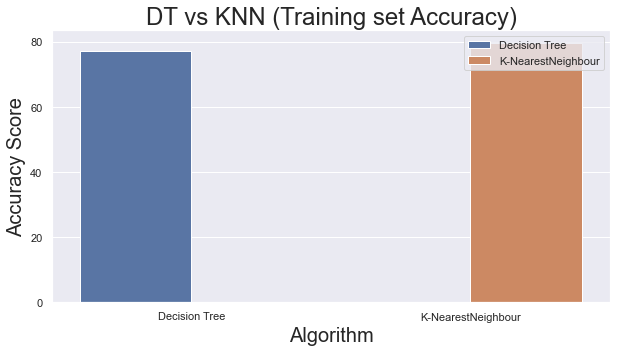

In [534]:
#bar plot for train accuracy DT vs KNN
sns.set_style('darkgrid')
x1 = ['Decision Tree','K-NearestNeighbour']
y1 = [training_data_accuracy1*100,training_data_accuracy2*100]
sns.set(rc = {'figure.figsize':(10,5)})
p = sns.barplot(x=x1,y=y1,hue = x1)
sns.set(font_scale = 2)
p.set_title("DT vs KNN (Training set Accuracy)")
p.set_xlabel("Algorithm", fontsize = 20)
p.set_ylabel("Accuracy Score", fontsize = 20)
plt.show()

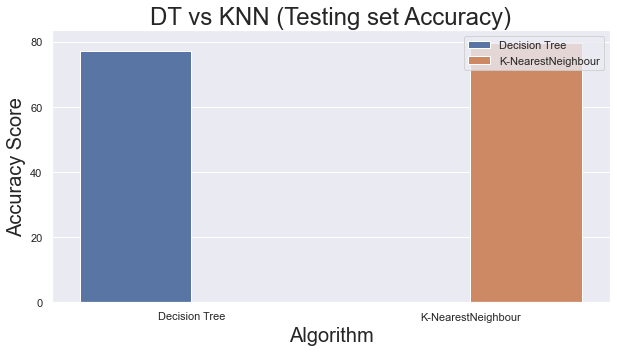

In [535]:
#bar plot for train accuracy DT vs KNN
sns.set_style('darkgrid')
x2 = ['Decision Tree','K-NearestNeighbour']
y2 = [test_data_accuracy1*100,test_data_accuracy2*100]
sns.set(rc = {'figure.figsize':(10,5)})
p = sns.barplot(x=x1,y=y1,hue = x1)
sns.set(font_scale = 2)
p.set_title("DT vs KNN (Testing set Accuracy)")
p.set_xlabel("Algorithm", fontsize = 20)
p.set_ylabel("Accuracy Score", fontsize = 20)
plt.show()